#### Lets Grow More(LGMVIP)- "DATA SCIENCE INTERN "
#### LGMVIP April- 2023
#### AUTHOR - KHUSHBOO SINGH
### MORE ADVANCED LEVEL TASK

## Task 10:  ML Facial Recognition to Detect Mood and Suggest Songs Accordingly

### Business Case: To categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). 

In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### Preparing Training Data

**Training Dataset link : https://drive.google.com/drive/folders/1QHbbwL2aNvx3ixKL9n35vkXBJNpE-Xzy?usp=sharing**

**Test Dataset Link : https://drive.google.com/drive/folders/1NghxUKa6iHiF3DvpYMY3W-WbSwWaII6U?usp=sharing**

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = r'D:\Downloads\ML face recognition\train-20230426T175419Z-001'
image_gen_train = ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
train_data_gen = image_gen_train.flow_from_directory(batch_size = 32,
                                                     directory = train_dir,
                                                     shuffle= True,
                                                     target_size = (224,224),
                                                     color_mode='grayscale',
                                                     class_mode = 'categorical')

Found 22982 images belonging to 1 classes.


### Plotting Random training Images

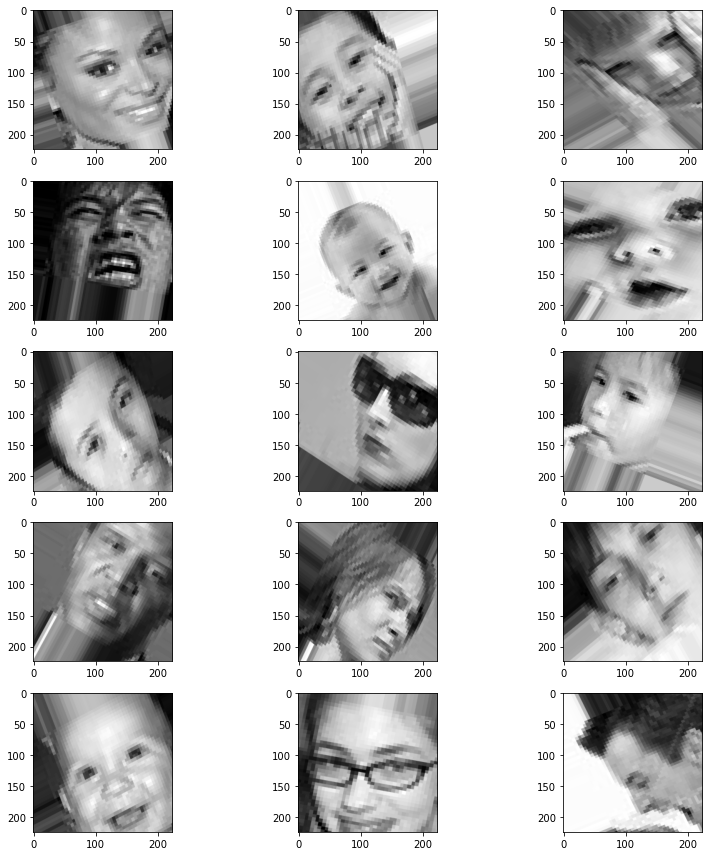

In [4]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3, i+1)
    for X, Y in train_data_gen:
        image=X[0]
        plt.imshow(image, cmap='gray')
        break
plt.tight_layout()
plt.show()

In [5]:
print("Train Data Class", train_data_gen.classes)
print("Train Data Class Indices", train_data_gen.class_indices)

Train Data Class [0 0 0 ... 0 0 0]
Train Data Class Indices {'train': 0}


### Preparing Test Image data

In [6]:
test_dir = r'D:\Downloads\ML face recognition\test-20230426T175809Z-001\test'
image_gen_test = ImageDataGenerator(rescale=1/255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=32,
                                                   directory=test_dir,
                                                   target_size=(224,224),
                                                   color_mode='grayscale',
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 7178 images belonging to 7 classes.


### Plotting randon test images

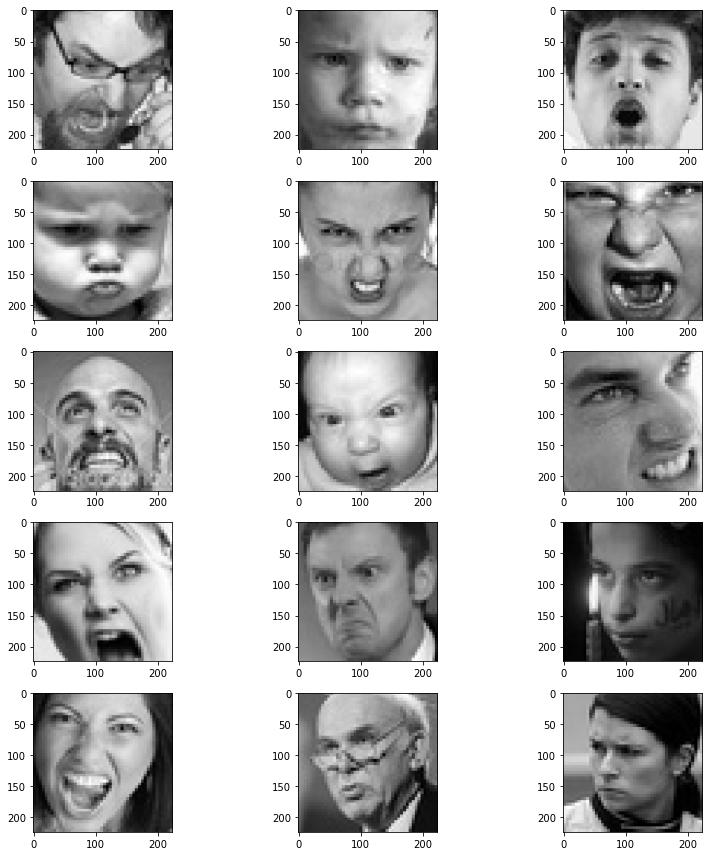

In [7]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3, i+1)
    for X, Y in test_data_gen:
        image=X[0]
        plt.imshow(image, cmap='gray')
        break
plt.tight_layout()
plt.show()

In [8]:
print("Test Data Class", test_data_gen.classes)
print("Test Data Class Indices", test_data_gen.class_indices)

Test Data Class [0 0 0 ... 6 6 6]
Test Data Class Indices {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


### Image Classification Model

In [9]:
X.shape

(32, 224, 224, 1)

In [10]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.models import Sequential

In [11]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 128)    5

### Training the model

In [12]:
## Compiling the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Training the model
hist=model.fit(train_data_gen, epochs=1, batch_size=32, validation_data=test_data_gen, verbose=1)

719/719 [==============================] - 5975s 8s/step - loss: 1538445.2500 - accuracy: 0.1827 - val_loss: 138745.9219 - val_accuracy: 0.1435


#### Due to availability of less resourses, model was trained on 1 epoch. Accuracy might be very low.

### Saving the CNN model so that there is no need of training all the time.

In [9]:
from tensorflow.keras.models import load_model
model.save("/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/CNN/model.h5")

#### Pre-Trained model link: https://drive.google.com/file/d/1mPmUpmu6b4B5m9pqFtRbij5K4OSgl5we/view?usp=sharing

In [11]:
model=load_model("/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/CNN/model.h5")

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(test_data_gen), axis=-1)
print(classification_report(test_data_gen.classes, y_pred, target_names=test_data_gen.class_indices.keys()), end='\n\n\n')

225/225 [==============================] - 3405s 15s/step
              precision    recall  f1-score   support

       angry       0.14      0.04      0.06       958
     disgust       0.00      0.00      0.00       111
        fear       0.12      0.12      0.12      1024
       happy       0.26      0.21      0.23      1774
     neutral       0.18      0.47      0.26      1233
         sad       0.21      0.23      0.22      1247
    surprise       0.00      0.00      0.00       831

    accuracy                           0.19      7178
   macro avg       0.13      0.15      0.13      7178
weighted avg       0.17      0.19      0.17      7178





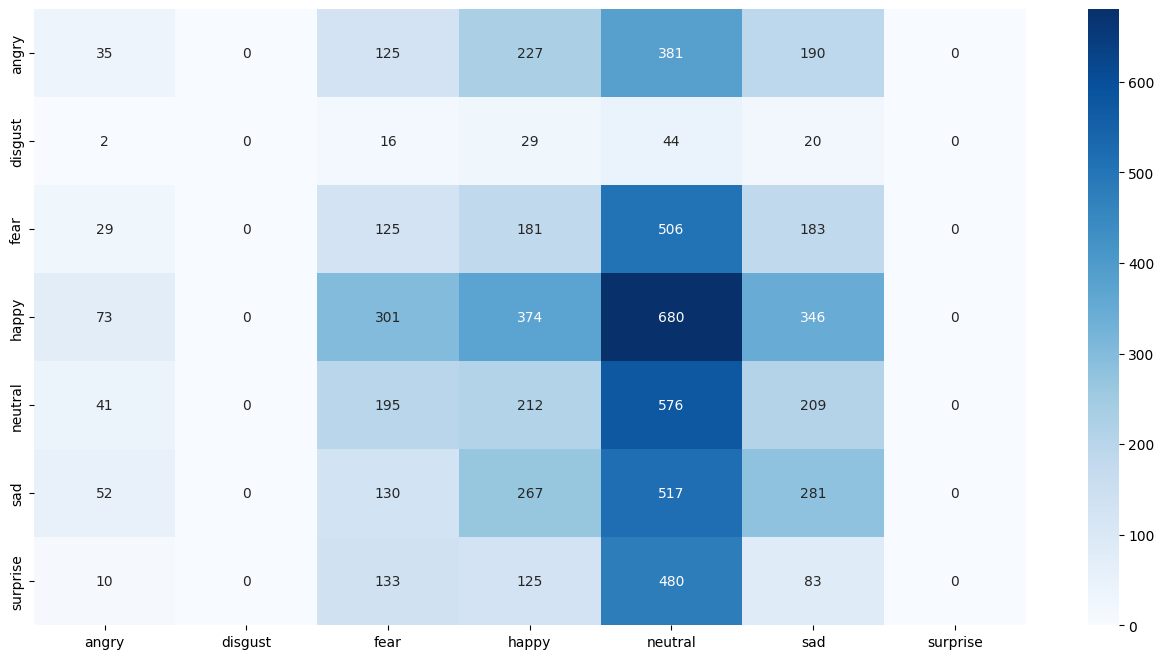

In [20]:
conf_matrix = confusion_matrix(test_data_gen.classes, y_pred)
plt.figure(figsize=(16,8))
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='.0f', xticklabels=test_data_gen.class_indices.keys(), yticklabels=test_data_gen.class_indices.keys())
plt.show()

### Playing Music based on Mood

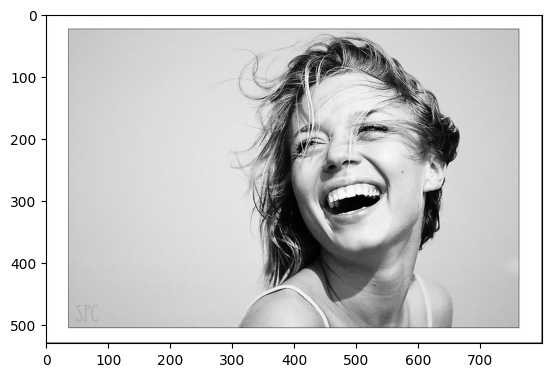

In [21]:
# Loading image
import cv2
image = cv2.imread(r"/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/testing_image.jpeg")
plt.imshow(image, cmap='Greys')
plt.show()

In [22]:
#Image preprocessing
#Resize image
frame = cv2.resize(image,(224,224),interpolation=cv2.INTER_BITS2)
testing_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) / 255.0
testing_image = testing_image.reshape(1,224,224,1)

In [24]:
# Predicting the mood
EMOTIONS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
pred=model.predict(testing_image)[0]
mood= EMOTIONS[pred.argmax()]
for (i,j) in zip(range(7),EMOTIONS):
    moods = pred[i]
print( "Mood of the person is :",mood)

1/1 [==============================] - 0s 401ms/step
Mood of the person is : Surprise


In [25]:
print("Test Data Class Indices", test_data_gen.class_indices)

Test Data Class Indices {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


#### Playing the Music according to the Mood

In [27]:
# From playsound import playsound
from IPython.display import Audio

In [40]:
if mood=='Angry':
    path="/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/CNN/angry.mp3"
    print("You are Angry so listen this Song:")
    print("Playing music {}.....🎵")
    Audio(path, autoplay=True)
    
elif (mood=='Disgust'):
    path="/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/CNN/disgust.mp3"
    print("You are Disgusting mood so listen this Song:")
    print("Playing music {}.....🎵")
    Audio(path, autoplay=True)
    
elif (mood=='Fear'):
    path="/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/CNN/peace.mp3"
    print("You have fear so listen this Song:")
    print("Playing music {}.....🎵")
    Audio(path, autoplay=True)
    
elif (mood=='Happy'):
    path="/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/CNN/happy.mp3"
    print("You are in Happy Mood so listen this Song:")
    print("Playing music {}.....🎵".format(path))
    Audio(path, autoplay=True)
    
elif (mood=='Sad'):
    path="/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/CNN/sad.mp3"
    print("You are in ok ok type mood so listen this Song:")
    print("Playing music.....🎵")
    Audio(path, autoplay=True)
    
elif (mood=='Surprise'):
    path="/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/CNN/suprise.mp3"
    print("You are Sad so listen this Song:")
    print("Playing music.....🎵")
    Audio(path, autoplay=True)

else:
    path="/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/CNN/neutral.mp3"
    print("You are Neutral mood so listen this Song:")
    print("Playing music {}.....🎵")
    Audio(path, autoplay=True)